### Guided Practice: Logit Function and Odds

In [1]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    logit = np.exp(odds)
    return logit

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    prob = np.exp(logit)/ (1+np.exp(logit))
    return(prob)

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

log_odds = .2

In [4]:
sigmoid_func(8/1)

0.99966464986953352

In [5]:
odds_set

[5.0, 20.0, 1.1, 1.8, 1.6]

In [6]:
for x in odds_set:
    print(sigmoid_func(x))

0.993307149076
0.999999997939
0.750260105595
0.8581489351
0.832018385134


In [7]:
logit_func(.2)
# You have an 22 better chance of whatever event is happening

1.2214027581601699

In [8]:
sigmoid_func(.2)
# Actual chance that the event occuring

0.54983399731247795

In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/lessons/lesson-9")
lm = LogisticRegression()

df = pd.read_csv('collegeadmissions.csv')

In [10]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [11]:
df = df.join(pd.get_dummies(df['rank'], prefix = "rank"))

In [12]:
df.drop("rank", axis = 1, inplace = True)

In [13]:
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [14]:
lm.fit(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print("R Squared: ", lm.score(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]],df["admit"]))
print("Coef: ",lm.coef_)
print("Y Intercept: ", lm.intercept_)
print("Mean of Users Admitted (Probability of Getting in): ", df["admit"].mean())
# print("Probability: ", lm.predict_proba(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]]))


R Squared:  0.7
Coef:  [[  1.63913356e-03   4.33354026e-04   1.15220976e+00   5.14395667e-01
   -3.62326172e-02]]
Y Intercept:  [-2.09315183]
Mean of Users Admitted (Probability of Getting in):  0.3175


In [16]:
print(np.exp(1.63913356e-03)*100, ": Every GRE score increased by 100 will increase your chances of being admitted by 16%")

100.164047767 : Every GRE score increased by 100 will increase your chances of being admitted by 16%


In [17]:
print(np.exp(4.33354026e-04)*100, ": Every GPA score increased will increase your chances of being admitted by 4%")

100.043344794 : Every GPA score increased will increase your chances of being admitted by 4%


In [18]:
print(np.exp(1.15220976e+00)*100, ": Rank 1 Schools have a 3.16 times advantage compared to rank 4 in getting into grad school")

316.517947453 : Rank 1 Schools have a 3.16 times advantage compared to rank 4 in getting into grad school


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [23]:
confusion_matrix(df["admit"], lm.predict(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]]))

array([[258,  15],
       [105,  22]])

In [37]:
# False Positive Rate
print(15/27)

0.5555555555555556


In [38]:
# True Positive Rate
print(258/362)

0.712707182320442


Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

### What can you plug in for the feature set?

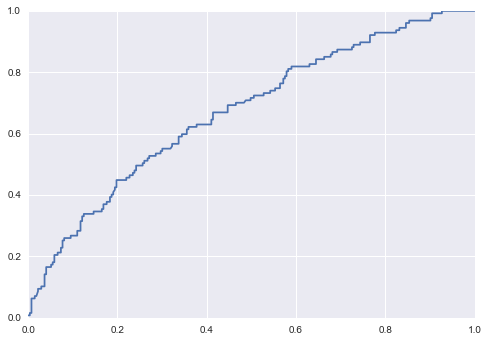

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

actuals = lm.predict(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]]) 
probas = lm.predict_proba(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]])
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

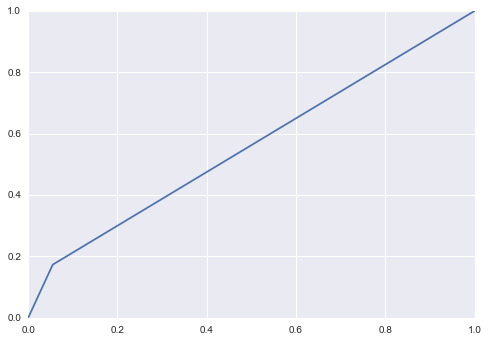

In [39]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [42]:
roc_auc_score(df['admit'], lm.predict(df[['gre', 'gpa', "rank_1", "rank_2", "rank_3"]]))

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).